# Import library and dataset brief overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")
%matplotlib inline

In [2]:
df = pd.read_csv("30-70cancerChdEtc.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2745 entries, 0 to 2744
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       2745 non-null   object 
 1   Period         2745 non-null   int64  
 2   Indicator      2745 non-null   object 
 3   Dim1           2745 non-null   object 
 4   First Tooltip  2745 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 107.4+ KB


In [3]:
df.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Both sexes,29.8
1,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Male,31.8
2,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Female,27.7
3,Afghanistan,2015,Probability (%) of dying between age 30 and ex...,Both sexes,29.8
4,Afghanistan,2015,Probability (%) of dying between age 30 and ex...,Male,31.9


In [4]:
n = 1
for col in df.columns:
    print(n)
    print(df[col].unique())
    n += 1

1
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Costa Rica' 'Côte d’Ivoire' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran (Islamic Republic of)'
 'Iraq' 'Ire

##### I will rename the dataset columns name and remove the "Indicator" column, it is useless.

In [5]:
df.drop(['Indicator'], axis = 'columns', inplace = True)
df.rename(columns = {
    'Location': 'Country',
    'Period': 'Years',
    'Dim1': 'Sex',
    'First Tooltip': 'Probability'
}, inplace = True)

##### The bothsexes in the Sex column are not logic, as it is not possible for a person have two sexes.
##### I will filter it out.

In [6]:
df = df[df['Sex'] != 'Both sexes']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1830 entries, 1 to 2744
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      1830 non-null   object 
 1   Years        1830 non-null   int64  
 2   Sex          1830 non-null   object 
 3   Probability  1830 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 71.5+ KB


In [7]:
df.head()

,Country,Years,Sex,Probability
1,Afghanistan,2016,Male,31.8
2,Afghanistan,2016,Female,27.7
4,Afghanistan,2015,Male,31.9
5,Afghanistan,2015,Female,27.8
7,Afghanistan,2010,Male,34.1


# Univariate Analysis

In [8]:
num_of_country = len(df['Country'].unique())
print(f'There are {num_of_country} different country in this dataset.')
df['Country'].value_counts().value_counts()

There are 184 different country in this dataset.


10    182
4       1
6       1
Name: Country, dtype: int64

##### Most of the country have 15 records, which is very balance

In [9]:
oldest_year = df['Years'].min()
latest_year = df['Years'].max()
print(f'The dataset are from {oldest_year} till {latest_year}.')
df['Years'].value_counts()

The dataset are from 2000 till 2016.


2000    366
2005    366
2010    366
2015    366
2016    366
Name: Years, dtype: int64

##### Each year have 549 records

In [10]:
df['Sex'].value_counts()

Male      915
Female    915
Name: Sex, dtype: int64

##### There are also have same number of record for Sex column

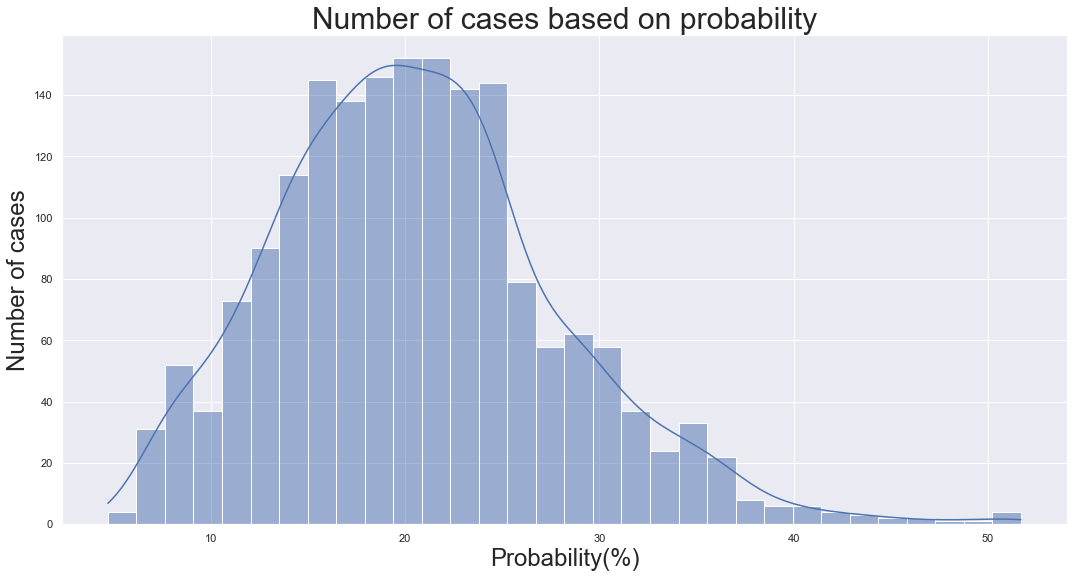

In [11]:
fig, ax = plt.subplots(figsize = (18, 9))
sns.histplot(ax = ax, data = df, x = 'Probability', kde = True, )
plt.xlabel('Probability(%)', fontsize = 24)
plt.ylabel('Number of cases', fontsize = 24)
plt.title('Number of cases based on probability', fontsize = 30)
plt.show()

##### As we can see, the distribution are approximating the normal distribution.
##### Most of the records are around 20% probability to get cancer.

In [12]:
print('Mean :', df['Probability'].mean(), '\n'
     'Median : ', df['Probability'].median(), '\n'
     'Mode : ', df['Probability'].mode()[0])

Mean : 20.674754098360655 
Median :  20.1 
Mode :  20.0


##### The mean, median, and mode are very close, which meets the normal distribution characteristic.

# Bivariate Analysis

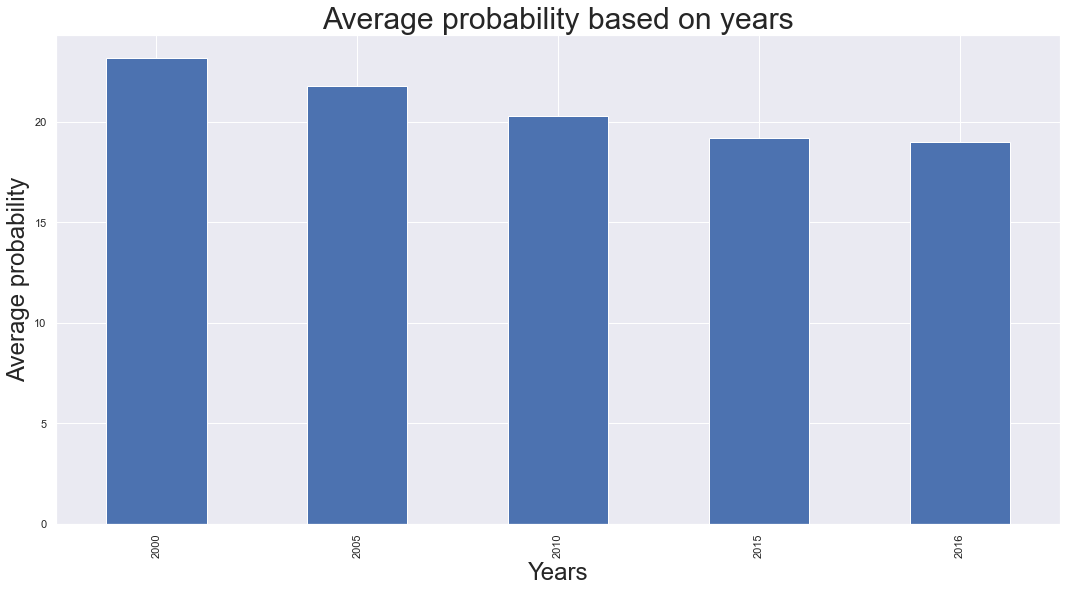

In [13]:
fig, ax = plt.subplots(figsize = (18, 9))
df.groupby('Years')['Probability'].agg('mean').plot(kind = 'bar')
plt.xlabel('Years', fontsize = 24)
plt.ylabel('Average probability', fontsize = 24)
plt.title('Average probability based on years', fontsize = 30)
plt.show()

##### As the graph show, the probability of dying from cancer were decreasing as the years goes on.

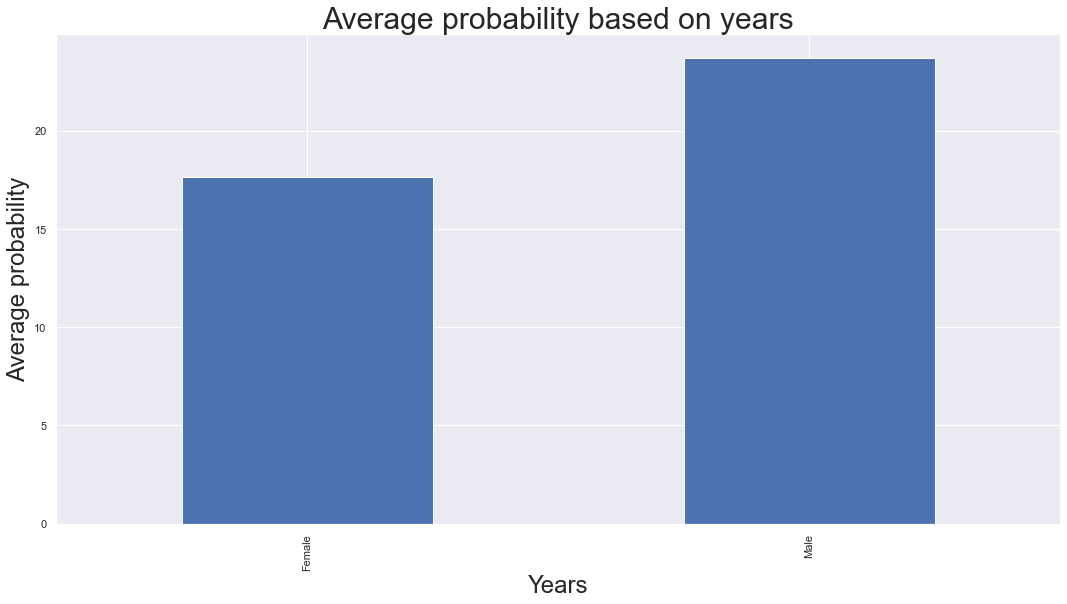

In [14]:
fig, ax = plt.subplots(figsize = (18, 9))
df.groupby('Sex')['Probability'].agg('mean').plot(kind = 'bar')
plt.xlabel('Years', fontsize = 24)
plt.ylabel('Average probability', fontsize = 24)
plt.title('Average probability based on years', fontsize = 30)
plt.show()

##### As the graph show, the male have higher probability die from cancer then female.